# **<center>Local Image Features</center>**


Local features and their descriptors, which are a compact vector representations of a local neighborhood, are the building blocks of many computer vision algorithms. Their applications include image registration, object detection and classification, tracking, and motion estimation. Using local features enables these algorithms to better handle scale changes, rotation, and occlusion. 

What Are Local Features?

Local features refer to a pattern or distinct structure found in an image, such as a point, edge, or small image patch. They are usually associated with an image patch that differs from its immediate surroundings by texture, color, or intensity. What the feature actually represents does not matter, just that it is distinct from its surroundings. Examples of local features are blobs, corners, and edge pixels.

**What Makes a Good Local Feature?**
Detectors that rely on gradient-based and intensity variation approaches detect good local features. These features include edges, blobs, and regions. Good local features exhibit the following properties:


* **Repeatable detections**
When given two images of the same scene, most features that the detector finds in both images are the same. The features are robust to changes in viewing conditions and noise.
* **Distinctive:**
The neighbourhood around the feature centre varies enough to allow for a reliable comparison between the features.
* **Localizable:**
The feature has a unique location assigned to it. Changes in viewing conditions do not affect its location.

**Feature Detection and Feature Extraction** <br>
Feature detection selects regions of an image that have unique content, such as corners or blobs. Use feature detection to find points of interest that you can use for further processing. These points do not necessarily correspond to physical structures, such as the corners of a table. The key to feature detection is to find features that remain locally invariant so that you can detect them even in the presence of rotation or scale change.<br>
Feature extraction involves computing a descriptor, which is typically done on regions centered around detected features. Descriptors rely on image processing to transform a local pixel neighborhood into a compact vector representation. This new representation permits comparison between neighborhoods regardless of changes in scale or orientation. 
Descriptors, such as SIFT or SURF, rely on local gradient computations.<br><br> 
Binary descriptors, such as BRISK or FREAK, rely on pairs of local intensity differences, which are then encoded into a binary vector.

Algorithms for detection Corner Features
*	FAST
*	Harris 
*	Shi & Tomasi

Algorithms for detection Blob Features
*	SURF (Speeded Up Robust feature)
*	MSER (maximally stable extremal regions)

Descriptors
*	ORB
*	FREAK
*	BRISK
*	HOG
* SURF
* BRIEF 


### Dependencies of this notebook
1. OpenCV 4.1.2
2. NumPy 1.18.5
3. Python 3.6.9

## **Demonstrations of some Algorithms**
Following are the algorithms that can be used for feature extraction and description in images using OpenCV. Lets demonstrate them one by one.

### Harris corner detection

It basically finds the difference in intensity for a displacement of (u,v) in all directions. This is expressed as below:
<center><img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/1948f2850c912ce3394b61ba99b546f1bf7a6adc.png" alt="Harris Corner Detection"></center>

<br>



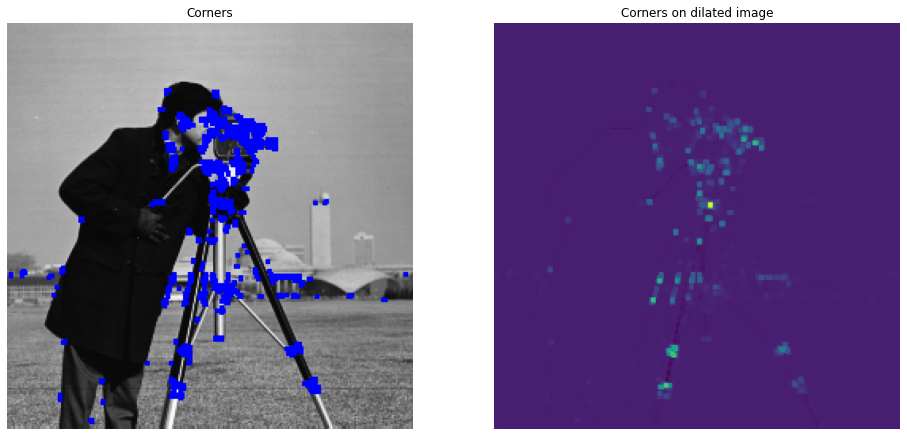

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'cameraman.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Corners')
ax2.axis('off')
ax2.imshow(dst)
ax2.set_title('Corners on dilated image')
plt.show()

## Shi-Tomasi Corner detector
In 1994, J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector.

We will use <i>cv2.goodFeaturesToTrack()</i>. It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

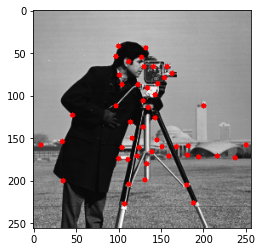

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cameraman.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#50 best corners
corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    #draw circles on corners
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)
plt.show()

### FAST Algorithm for Corner Detection

We can see several feature detectors in literature and many of them are really good. But when looking from a real-time application point of view, they are not fast enough.<br> <br>
As a solution to this, FAST (Features from Accelerated Segment Test) algorithm was proposed by Edward Rosten and Tom Drummond in their paper “Machine learning for high-speed corner detection” in 2006 (Later revised it in 2010).

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1460
Total Keypoints without nonmaxSuppression: 4775


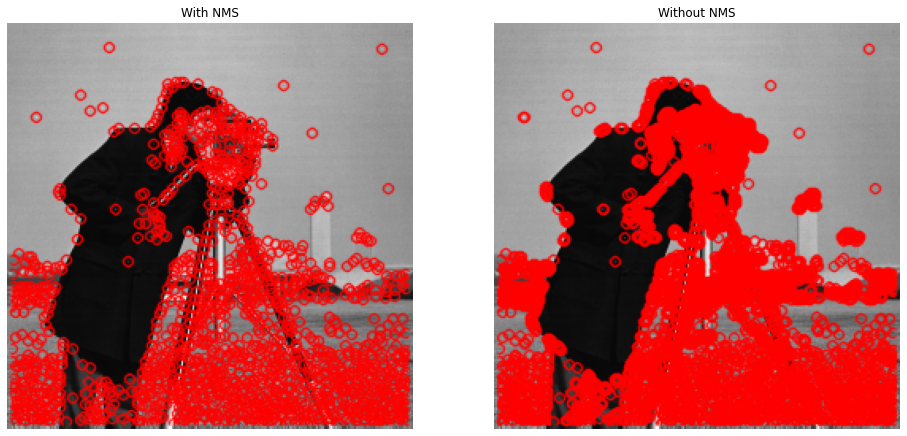

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cameraman.png',1)
img2 = img.copy()

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img2, cmap=plt.cm.gray)
ax1.set_title('With NMS')
ax2.axis('off')
ax2.imshow(img3)
ax2.set_title('Without NMS')
plt.show()

# Non-maximum suppression:- is a class of algorithms to select one entity out of many overlapping entities.

## **ORB for feature detection and description**

SIFT and SURF are good in what they do, but they are not free. Yeah, they are patented!!! To solve that problem, OpenCV devs came up with a new “FREE” alternative to SIFT & SURF, and that is ORB.

(256, 256)


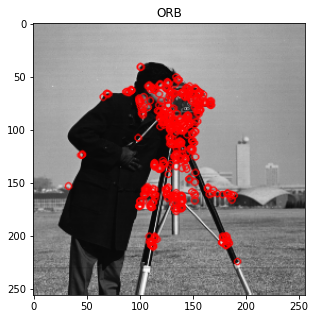

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# you can use following code to increase or decrease your figure size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

img = cv2.imread('cameraman.png',0)
print(img.shape)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp_orb, des_orb = orb.detectAndCompute(img, None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp_orb, None, color=(255,0,0))
plt.imshow(img2)
plt.title("ORB")
plt.show()

## **Feature matching**



Rotate the same image for further demonstration

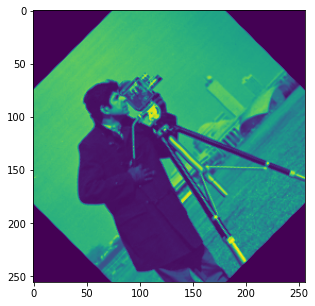

In [5]:
# you can use following code to increase or decrease your figure size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
#rotate
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

img_rotated = rotate_image(img,45)
plt.imshow(img_rotated)

ORB on rotated Image

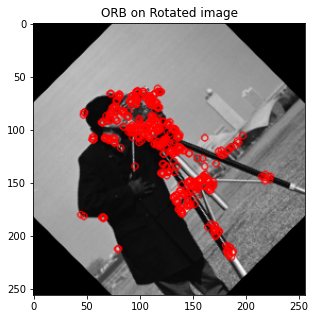

In [6]:
# you can use following code to increase or decrease your figure size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

# find the keypoints and descriptors with ORB
kp_orb_rotated, des_orb_rotated = orb.detectAndCompute(img_rotated, None)

# draw only keypoints location,not size and orientation
img_rotated_2 = cv2.drawKeypoints(img_rotated, kp_orb_rotated, None, color=(255,0,0))
plt.imshow(img_rotated_2)
plt.title("ORB on Rotated image")
plt.show()

## **Basics of Brute-Force Matcher**
Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

274


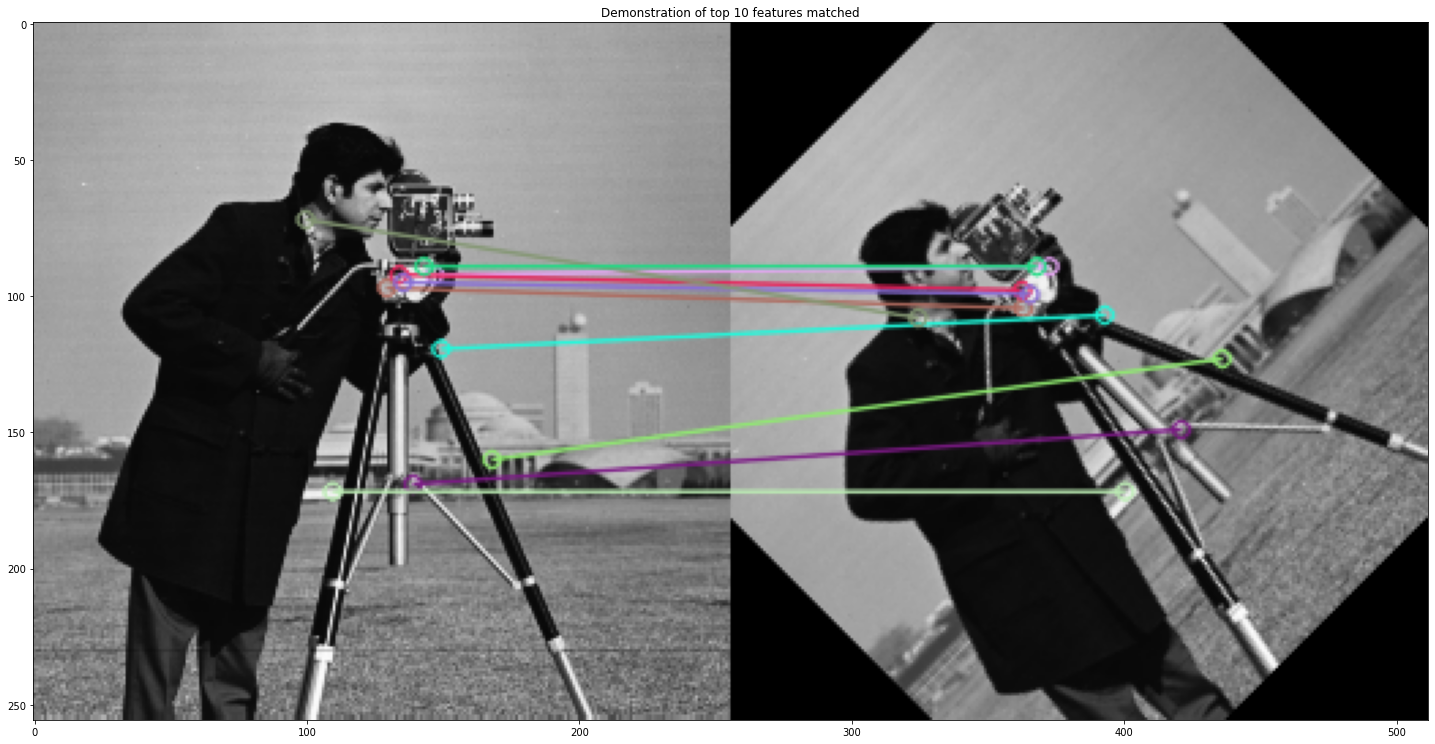

In [7]:
# you can use following code to increase or decrease your figure size
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des_orb, des_orb_rotated)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
#lets show top 10 features matched
image_with_feature_matched = cv2.drawMatches(img, kp_orb, img_rotated, kp_orb_rotated, matches[:10], None, flags=2)
plt.imshow(image_with_feature_matched)
plt.title("Demonstration of top 10 features matched")
plt.show()

## **BRIEF (Binary Robust Independent Elementary Features)**

SIFT uses a feature descriptor with 128 floating point numbers. Consider thousands of such features. It takes lots of memory and more time for matching. We can compress it to make it faster. But still we have to calculate it first. There comes BRIEF which gives the shortcut to find binary descriptors with less memory, faster matching, still higher recognition rate.

**One important point** is that BRIEF is a feature descriptor, it doesn't provide any method to find the features. So you will have to use any other feature detectors like SIFT, SURF etc. The paper recommends to use CenSurE which is a fast detector and BRIEF works even slightly better for CenSurE points than for SURF points.

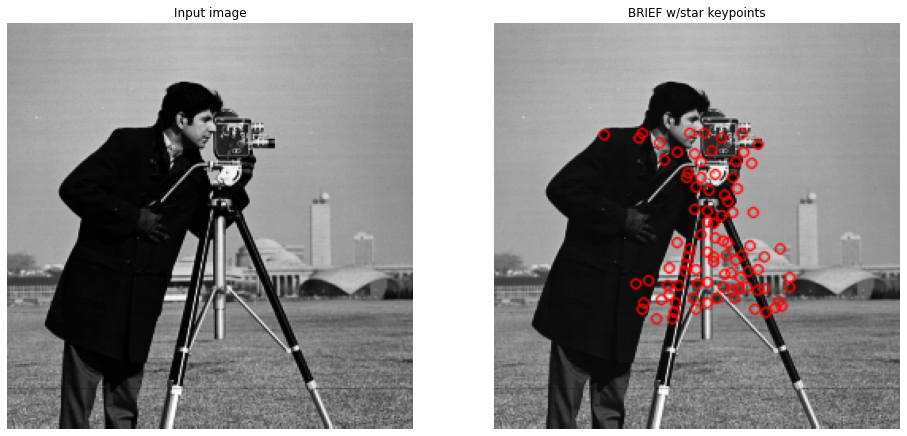

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

img = cv2.imread('cameraman.png',0)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

#now draw
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(img2)
ax2.set_title('BRIEF w/star keypoints')
plt.show()


# **Histogram of Oriented Gradients**

Compute a Histogram of Oriented Gradients (HOG) by

1. (optional) global image normalization
2. computing the gradient image in row and col
3. computing gradient histograms
4. normalizing across blocks
5. flattening into a feature vector

Find more details about parameters here: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

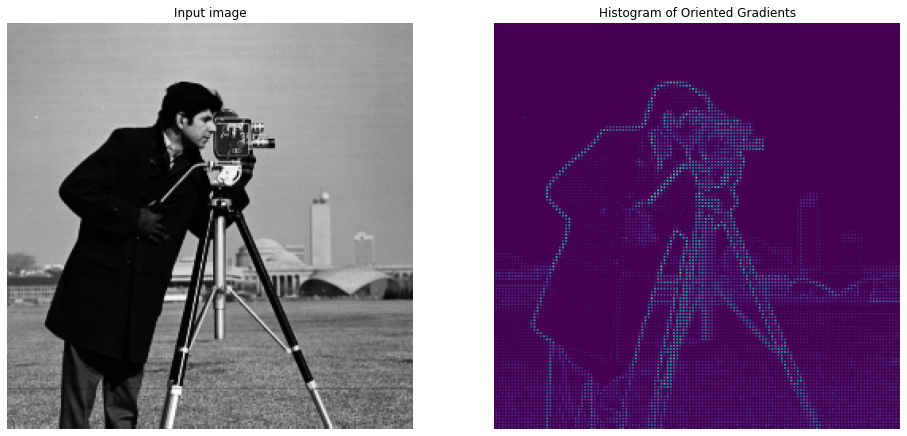

In [9]:
#Computing HoG features
from skimage import feature
from skimage import exposure
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('cameraman.png',0)
(hog_descriptor, hog_image)=  feature.hog(img, orientations = 3, pixels_per_cell  = (2, 2), cells_per_block  = (2, 2),
                                          transform_sqrt=True, block_norm  = 'L1' , visualize=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 255))
ax2.axis('off')
ax2.imshow(hog_image_rescaled)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()